#Speech Emotion Recognition (SER)
SER  is a system that can recognize the emotions of different voice samples.Refers to the process that the computer analyses the signal collected from the sensor to obtain the emotion state.




#Dataset

#The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)
_Audio-only files
_All actors (01-24) are available as two separate zip files (~200 MB each):
Speech file (Audio_Speech_Actors_01-24.zip, 215 MB) contains 1440 files: 60 trials per actor x 24 actors = 1440.

---------------------
#Toronto emotional speech set (TESS)

There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral).

Total=2800
--------------------



# Mount google drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Install following libraries

# Make the necessary imports

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import os.path
from pathlib import Path

from IPython.display import Audio
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import*

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!unzip /content/drive/MyDrive/Ravdess.zip

Archive:  /content/drive/MyDrive/Ravdess.zip
   creating: Ravdess/
   creating: Ravdess/Actor_01/
  inflating: Ravdess/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Ravdess/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Ravdess/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Ravdess/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Ravdess/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Ravdess/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Ravdess/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Ravdess/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Ravdess/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Ravdess/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Ravdess/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Ravdess/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Ravdess/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Ravdess/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Ravdess/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Ravdess/Actor_01/03-01-03-01-02-02

In [ ]:
!unzip /content/drive/MyDrive/TESS.zip

Archive:  /content/drive/MyDrive/TESS.zip
   creating: TESS/OAF_angry/
  inflating: TESS/OAF_angry/OAF_back_angry.wav  
  inflating: TESS/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS/OAF_angry/OAF_base_angry.wav  
  inflating: TESS/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS/OAF_angry/OAF_book_angry.wav  
  inflating: TESS/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS/OAF_angry/OAF_cab_angry.wav  
  inflating: TESS/OAF_angry/OAF_calm_angry.wav  
  inflating: TESS/OAF_angry/OAF_came_angry.wav  
  inflating: TESS/OAF_angry/OAF_cause_angry.wav  
  inflating: TESS/OAF_angry/OAF_chain_angry.wav  
  inflating: TESS/OAF_angry/OAF_chair_angry.wav  
  inflating: TESS/OAF_angry/OAF_chalk_angry.w

In [ ]:
def get_files(dir):

    files = glob(dir + '*/*.wav')
    print(f"{dir} file counts : ", len(files))

    return files

In [ ]:
ravdess_rootdir = '/content/Ravdess/'
tess_rootdir = '/content/TESS/'

In [ ]:
ravdess = get_files(ravdess_rootdir)
tess =  get_files(tess_rootdir)

/content/Ravdess/ file counts :  1440
/content/TESS/ file counts :  2800


In [ ]:
#this is the mapping for RAVDEE dataset, map the label into actual emotions or descriptions for easy analysis

dict_emotion = {

    "01" : "neutral",
    "02" : "calm",
    "03" : "happy",
    "04" : "sad",
    "05" : "angry",
    "06" : "fear",
    "07" : "disgust",
    "08" : "surprised"

}

In [ ]:
emotion = []
file = []
audio = []
source = []

#RAVDESS dataset, extract the emotion from filename
for r in ravdess:
    file.append(r)

    #save the audio
    data, _ = librosa.load(r)

    #get the emotion part
    emotion.append(dict_emotion[r.split("-")[2]])
    audio.append(data)
    source.append('ravdess')

In [ ]:
#TESS dataset, extract the emotion from filename

for t in tess:

    file.append(t)

    #save the audio
    data, _ = librosa.load(t)

    #get the emotion part
    emo = t.split("_")[-1].split(".")[0]

    if emo == "ps":
        emo = "surprised"

    emotion.append(emo)
    audio.append(data)
    source.append('tess')

In [ ]:
#convert to dataframe
data = {'file':file, 'emotion':emotion,'audio':audio,'source': source}

DATA = pd.DataFrame(data)

In [ ]:
def play_librosa(wav_file, source='None'):

    print("WAV: ", wav_file)

    audio, sfreq = librosa.load(wav_file)
    time = np.arange(0, len(audio)) / sfreq

    print('Sample Rate:', sfreq)

    fig, ax = plt.subplots()
    ax.plot(time, audio)
    ax.set(xlabel='Time (sec)',  ylabel='Sound Amplitude')

    return Audio(data=audio, rate=sfreq)

In [ ]:
DATA.head()

,file,emotion,audio,source
0,/content/Ravdess/Actor_07/03-01-06-01-02-01-07...,fear,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ravdess
1,/content/Ravdess/Actor_07/03-01-08-01-02-02-07...,surprised,"[-3.8538443e-13, -1.7898675e-13, 5.050617e-13,...",ravdess
2,/content/Ravdess/Actor_07/03-01-02-01-02-01-07...,calm,"[8.386637e-05, 9.611239e-05, 9.414725e-05, 8.2...",ravdess
3,/content/Ravdess/Actor_07/03-01-01-01-02-01-07...,neutral,"[-5.724375e-05, -0.00012062581, -8.164345e-05,...",ravdess
4,/content/Ravdess/Actor_07/03-01-02-02-01-01-07...,calm,"[0.00028094117, 8.157623e-05, -8.615675e-05, 0...",ravdess


In [ ]:
def play_librosa(wav_file, source='None'):

    print("WAV: ", wav_file)

    audio, sfreq = librosa.load(wav_file)
    time = np.arange(0, len(audio)) / sfreq

    print('Sample Rate:', sfreq)

    fig, ax = plt.subplots()
    ax.plot(time, audio)
    ax.set(xlabel='Time (sec)',  ylabel='Sound Amplitude')

    return Audio(data=audio, rate=sfreq)

In [ ]:
sample_rate = 22050
def Feature_Extraction(X):

    result = np.array([])

    stft = np.abs(librosa.stft(X))


    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfcc))

    mfcc_std = np.std(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfcc_std))

    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma ))

    chroma_std = np.std(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_std))

    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    mel_std = np.std(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel_std))

    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, contrast))

    contrast_std = np.std(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, contrast_std ))

    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0)
    result = np.hstack((result, tonnetz ))

    tonnetz_std = np.std(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0)
    result = np.hstack((result, tonnetz_std ))

    return result

In [ ]:
X, _ = librosa.load(DATA["file"][0])
mfcc_mean = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)

In [ ]:
DATA.loc[27]

file       /content/Ravdess/Actor_07/03-01-03-01-01-01-07...
emotion                                                happy
audio      [8.812051e-07, -6.4159565e-07, -3.1369837e-07,...
source                                               ravdess
Name: 27, dtype: object

In [ ]:
DATA[DATA.loc[:]["emotion"] == "angry"]

,file,emotion,audio,source
7,/content/Ravdess/Actor_07/03-01-05-01-02-02-07...,angry,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ravdess
19,/content/Ravdess/Actor_07/03-01-05-01-01-02-07...,angry,"[5.584638e-05, 8.366498e-05, 0.000111117224, 0...",ravdess
20,/content/Ravdess/Actor_07/03-01-05-01-01-01-07...,angry,"[2.8262813e-05, 3.0471216e-05, 3.3874032e-05, ...",ravdess
25,/content/Ravdess/Actor_07/03-01-05-01-02-01-07...,angry,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ravdess
34,/content/Ravdess/Actor_07/03-01-05-02-02-02-07...,angry,"[2.8967715e-05, 3.272378e-05, 2.8685325e-05, 3...",ravdess
...,...,...,...,...
4235,/content/TESS/YAF_angry/YAF_join_angry.wav,angry,"[0.00013175621, 8.659698e-05, -0.0006284304, -...",tess
4236,/content/TESS/YAF_angry/YAF_sheep_angry.wav,angry,"[0.00023680904, -2.2071363e-05, -0.001010071, ...",tess
4237,/content/TESS/YAF_angry/YAF_white_angry.wav,angry,"[2.1435095e-05, -0.00017096454, -0.00038226272...",tess
4238,/content/TESS/YAF_angry/YAF_peg_angry.wav,angry,"[0.00013427023, 0.00027483763, -0.001400261, -...",tess


In [ ]:
data = []
data.append(DATA.loc[27]) #happy
data.append(DATA.loc[12]) #disgust
data.append(DATA.loc[4])  #calm
data.append(DATA.loc[1])  #surprised
data.append(DATA.loc[0])  #fear
data.append(DATA.loc[3])  #neutral
data.append(DATA.loc[7])  #angry
data.append(DATA.loc[5])  #sad

data =  pd.DataFrame(data)
data = data.reset_index()
data


,index,file,emotion,audio,source
0,27,/content/Ravdess/Actor_07/03-01-03-01-01-01-07...,happy,"[8.812051e-07, -6.4159565e-07, -3.1369837e-07,...",ravdess
1,12,/content/Ravdess/Actor_07/03-01-07-01-02-01-07...,disgust,"[-2.8213584e-05, -3.681374e-05, -1.6076034e-05...",ravdess
2,4,/content/Ravdess/Actor_07/03-01-02-02-01-01-07...,calm,"[0.00028094117, 8.157623e-05, -8.615675e-05, 0...",ravdess
3,1,/content/Ravdess/Actor_07/03-01-08-01-02-02-07...,surprised,"[-3.8538443e-13, -1.7898675e-13, 5.050617e-13,...",ravdess
4,0,/content/Ravdess/Actor_07/03-01-06-01-02-01-07...,fear,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ravdess
5,3,/content/Ravdess/Actor_07/03-01-01-01-02-01-07...,neutral,"[-5.724375e-05, -0.00012062581, -8.164345e-05,...",ravdess
6,7,/content/Ravdess/Actor_07/03-01-05-01-02-02-07...,angry,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ravdess
7,5,/content/Ravdess/Actor_07/03-01-04-01-01-02-07...,sad,"[9.46614e-13, 4.5182703e-13, 1.9586873e-12, -6...",ravdess


In [ ]:
import seaborn as sns
from IPython.display import Audio
import librosa
import librosa.display
from sklearn.preprocessing import scale, minmax_scale
import soundfile as sf


In [ ]:
def Visualize(data,feature):
  """
        [1] Description: Visualize all audio features
        [2] Arguments: data, feature
        [3] Return: None
  """
  if feature == "wave":
    plt.figure(figsize=(20, 8))
    for x in range(0,8):
        plt.subplot(2,4,x+1)
        librosa.display.waveshow(data.loc[x]["audio"], sr=22050,alpha=0.5)
        plt.title(data.loc[x]["emotion"])
        plt.ylim((-0.5, 0.5))
    plt.suptitle("RAVDESS Waveform", size=16);
    plt.tight_layout()

  elif feature == "Amplitude":
    plt.figure(figsize=(20, 8))
    for x in range(0,8):
        plt.subplot(2,4,x+1)
        librosa.display.waveshow(data.loc[x]["audio"], sr=22050,alpha=0.5)
        ae_normal = np.array([max(data.loc[x]["audio"][i:i+512]) for i in range(0, len(data.loc[x]["audio"]), 256)])
        frames = range(len(ae_normal))
        t = librosa.frames_to_time(frames, hop_length=256)
        plt.plot(t, ae_normal, color="red")
        plt.title(data.loc[x]["emotion"])
        plt.ylim((-.5, .5))
    plt.suptitle("Amplitude", size=16);
    plt.tight_layout()

  elif feature == "mfcc":

    fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True,figsize=(20,5))
    for x in range(len(data)):
        r = np.int64(np.floor(x/4))
        c = x%4
        mfccs = librosa.feature.mfcc(y=data.loc[x]["audio"], sr=22050)
        mfccs = scale(mfccs, axis=1)
        img = librosa.display.specshow(mfccs, sr=22050,  ax=ax[r,c])
        ax[r,c].set(title=data.loc[x]["emotion"])
    fig.colorbar(img, ax=ax)
    plt.suptitle("MFCC", size=16);

  elif feature == "mel":
    fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True,figsize=(20,5))
    for x in range(len(data)):
        r = np.int64(np.floor(x/4))
        c = x%4
        mel_features = librosa.feature.melspectrogram(y = data.loc[x]["audio"], sr=22050)
        log_mel_features = librosa.power_to_db(mel_features, ref=np.max)
        img = librosa.display.specshow(log_mel_features, y_axis="log", ax=ax[r,c])
        ax[r,c].set(title=data.loc[x]["emotion"])
    fig.colorbar(img, ax=ax)
    plt.suptitle("MEL Spectrogram", size=16);

  elif feature == "chroma":

    fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True,figsize=(20,5))
    for x in range(len(data)):
        r = np.int64(np.floor(x/4))
        c = x%4
        S = np.abs(librosa.stft(data.loc[x]["audio"]))
        chroma = librosa.feature.chroma_stft(S=S, sr=22050)
        img = librosa.display.specshow(chroma, y_axis='chroma',  ax=ax[r,c])
        ax[r,c].set(title=data.loc[x]["emotion"])
    fig.colorbar(img, ax=ax)
    plt.suptitle("Chroma STFT", size=16);


  elif feature == "rms":

    plt.figure(figsize=(20, 10))
    for x in range(len(data)):
        plt.subplot(2,4,x+1)
        librosa.display.waveshow(data.loc[x]["audio"], sr=22050,alpha=0.5)
        rmse = librosa.feature.rms(y=data.loc[x]["audio"], frame_length=512, hop_length=256)
        frames = range(len(rmse[0]))
        t = librosa.frames_to_time(frames, hop_length=256)
        plt.plot(t, rmse[0], color="red")
        plt.title(data.loc[x]["emotion"])
        plt.ylim((-.3, .3))
    plt.suptitle("RMS", size=16);
    plt.tight_layout()


  elif feature == "zcr":

    plt.figure(figsize=(20, 10))
    for x in range(len(data)):
        plt.subplot(2,4,x+1)
        crossing = librosa.feature.zero_crossing_rate(y=data.loc[x]["audio"], frame_length=512, hop_length=256)
        frames = range(len(crossing[0]))
        t = librosa.frames_to_time(frames, hop_length=256)
        plt.plot(t, crossing[0], color="red")
        plt.title(data.loc[x]["emotion"])
    plt.suptitle("ZCR", size=16);
    plt.tight_layout()


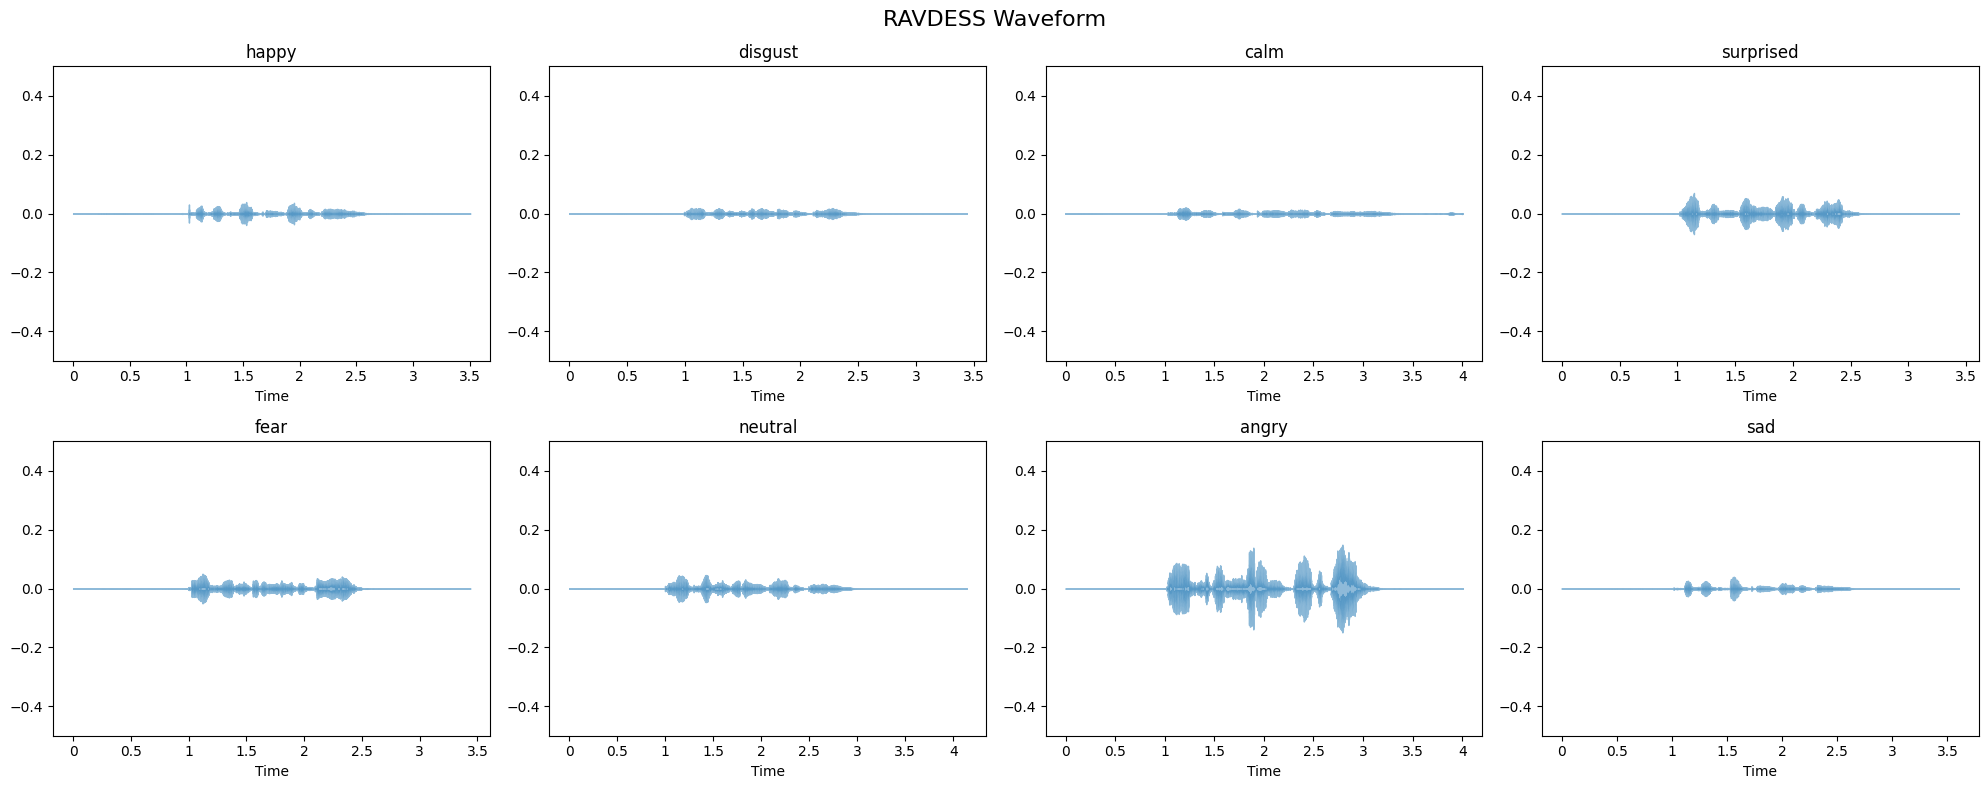

In [ ]:
Visualize(data,"wave")

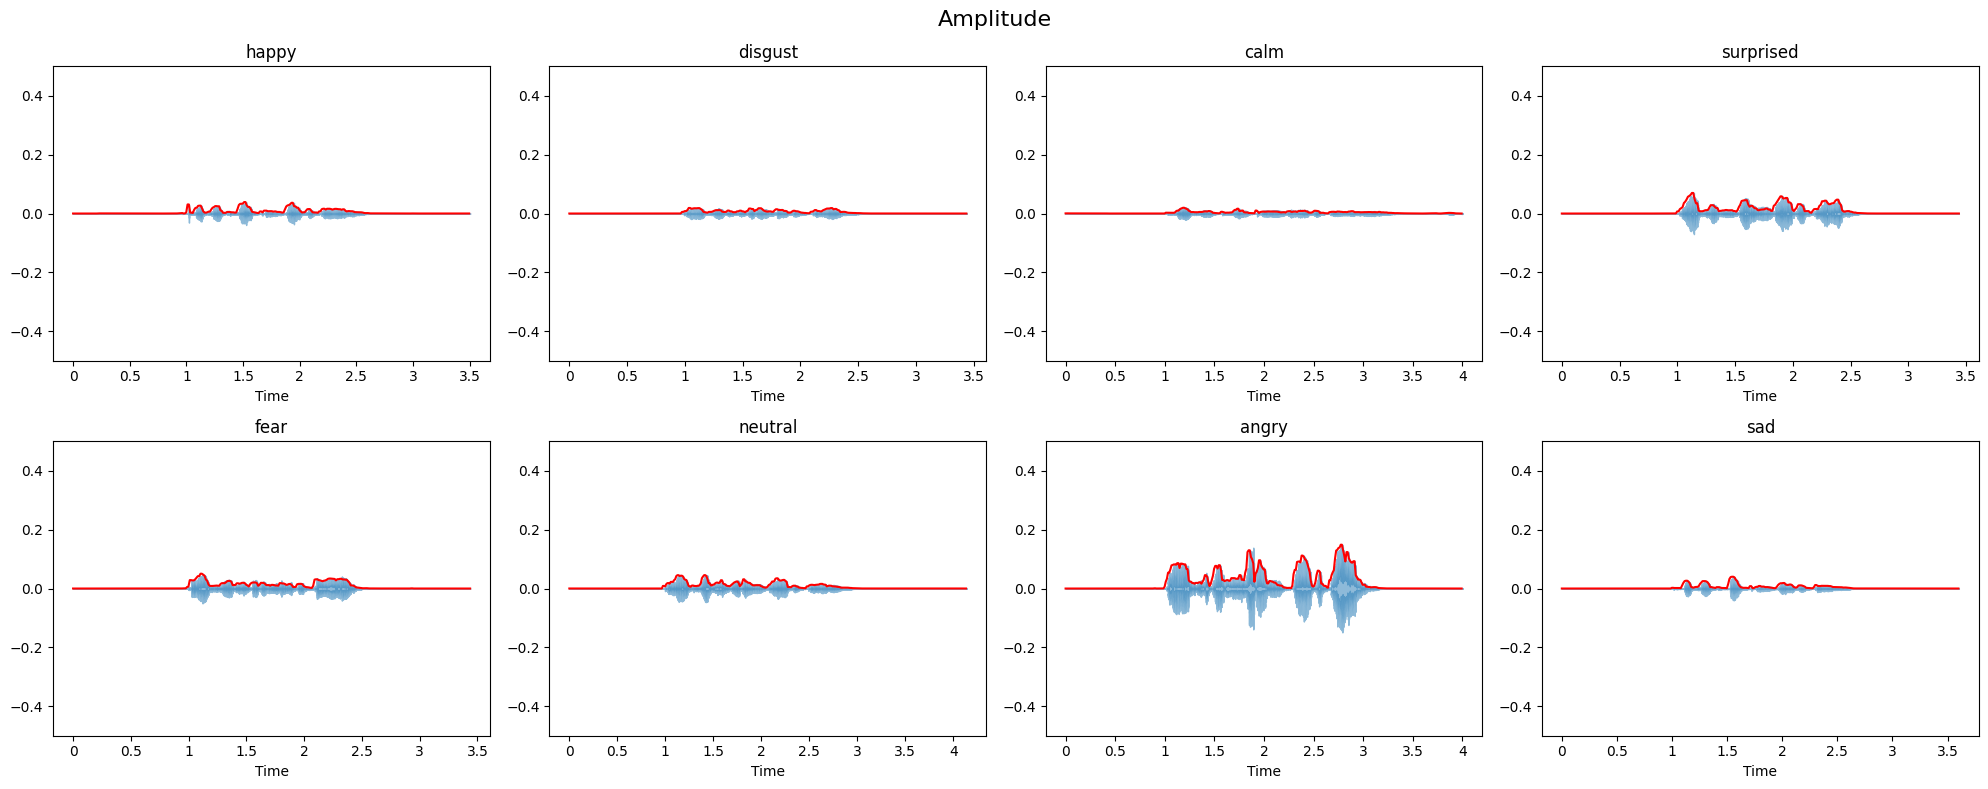

In [ ]:
Visualize(data,"Amplitude")

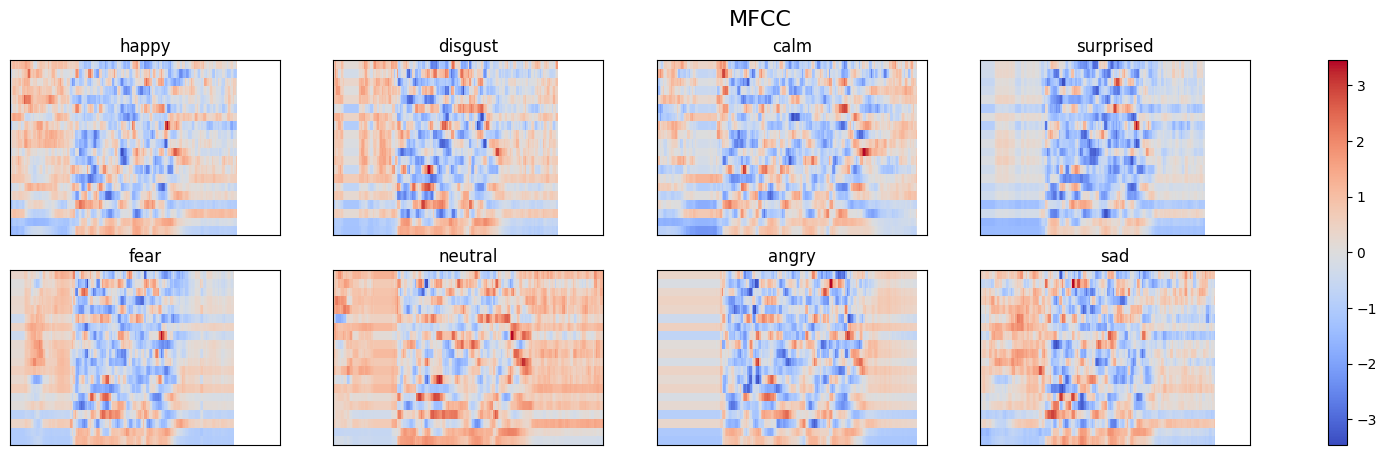

In [ ]:
Visualize(data,"mfcc")

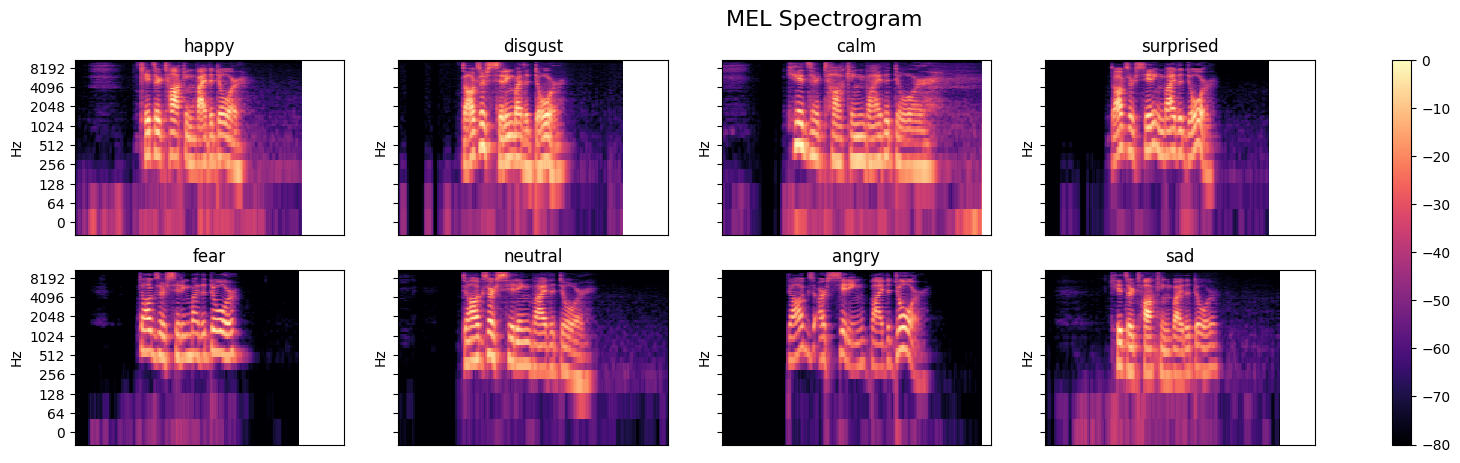

In [ ]:
Visualize(data,"mel")

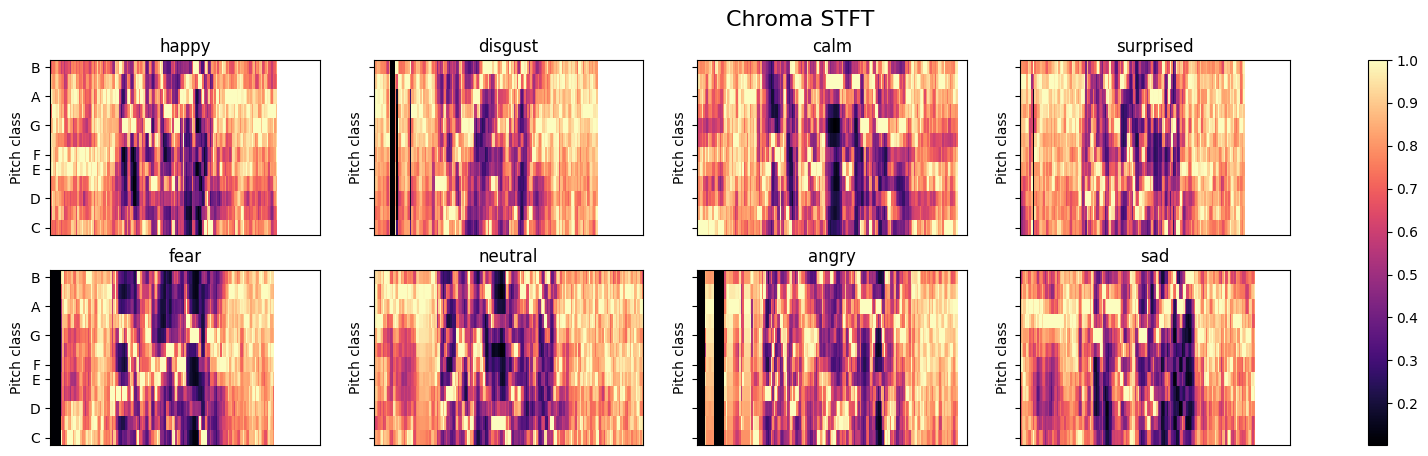

In [ ]:
Visualize(data,"chroma")

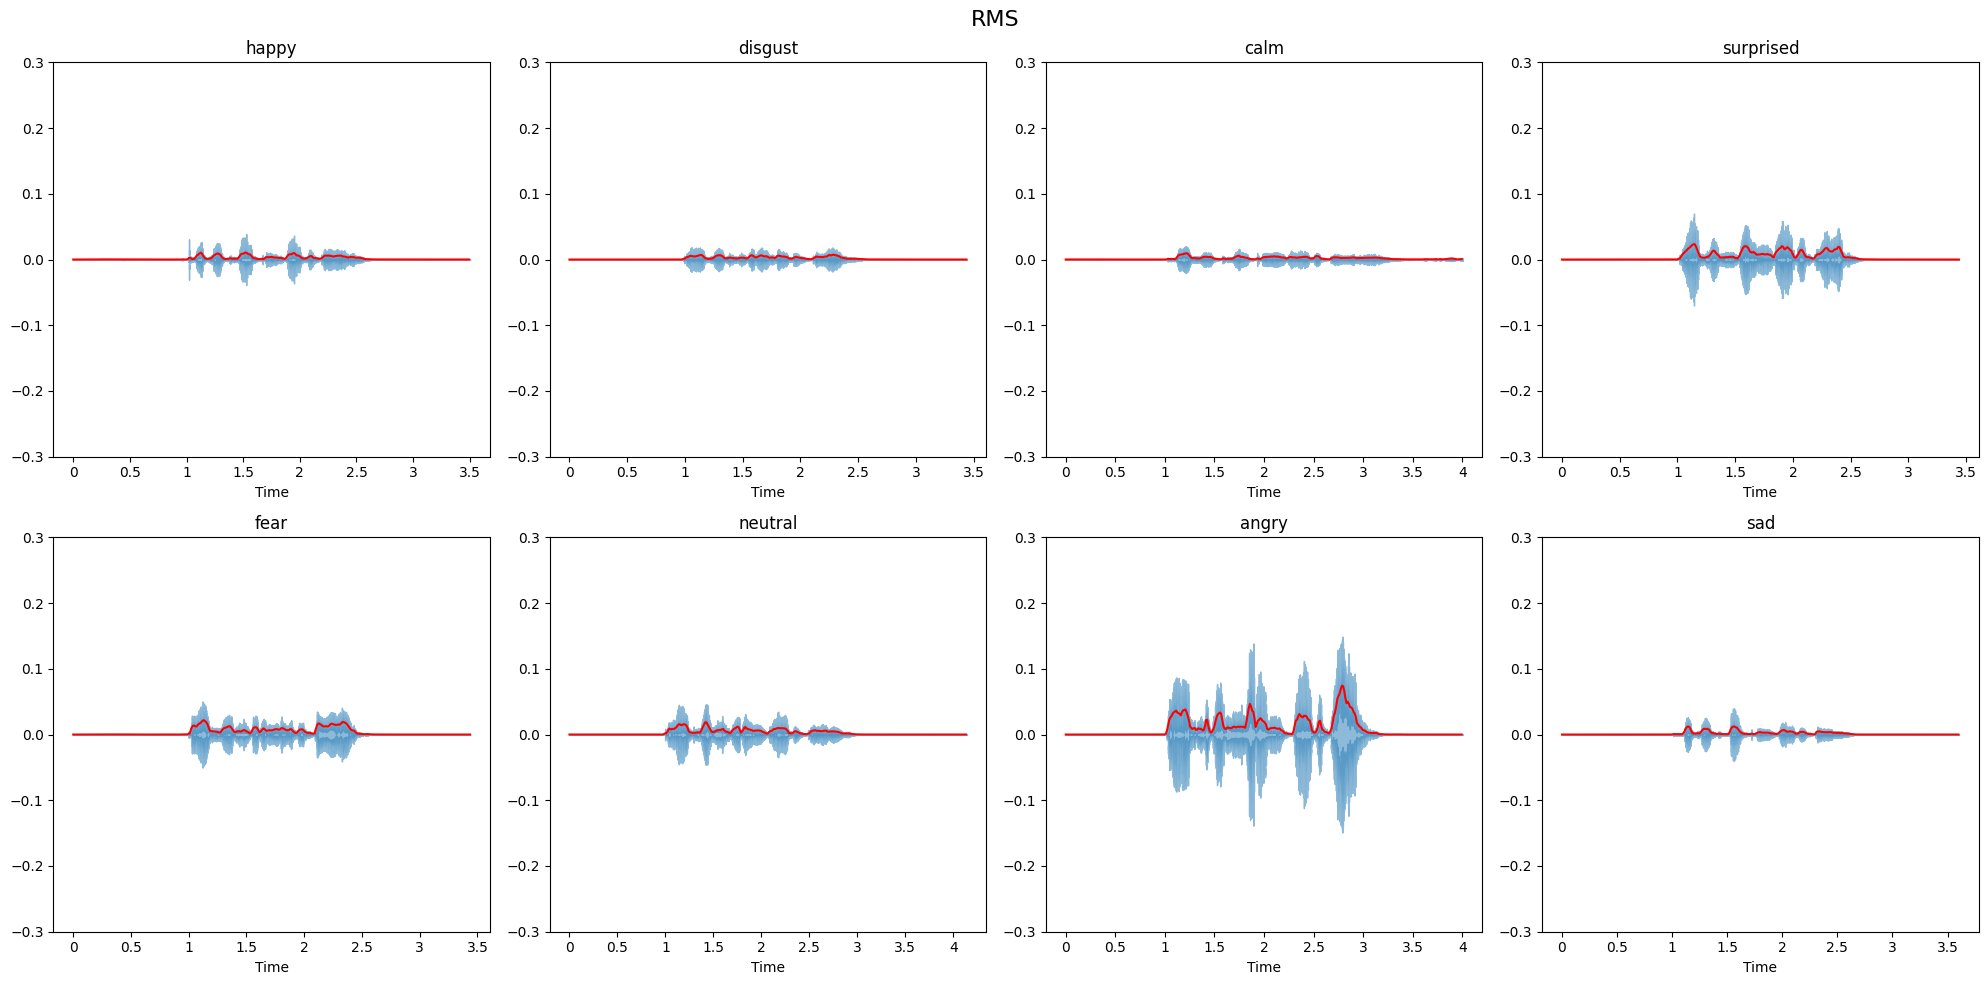

In [ ]:
Visualize(data,"rms")

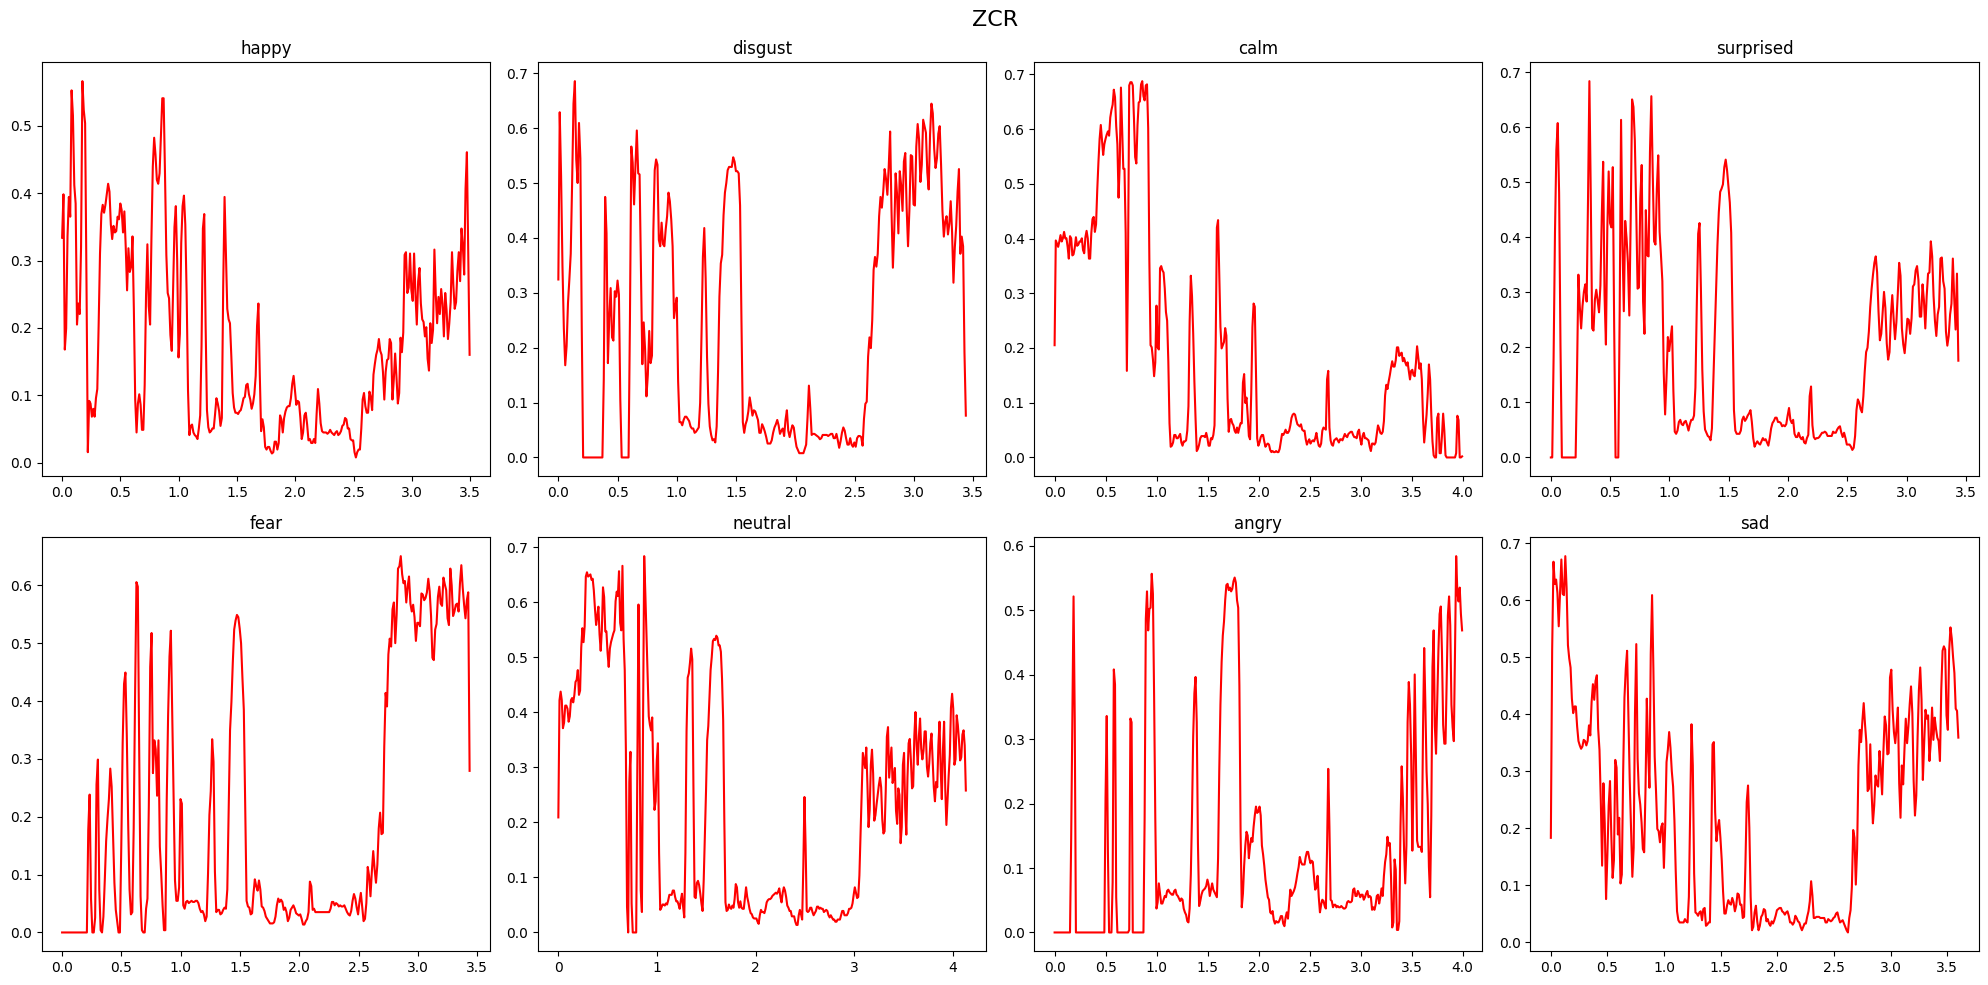

In [ ]:
Visualize(data,"zcr")

In [ ]:
samples, sample_rate = librosa.load(DATA["file"][5])

In [ ]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5) * 2000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=22050 ,n_steps=pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

happy


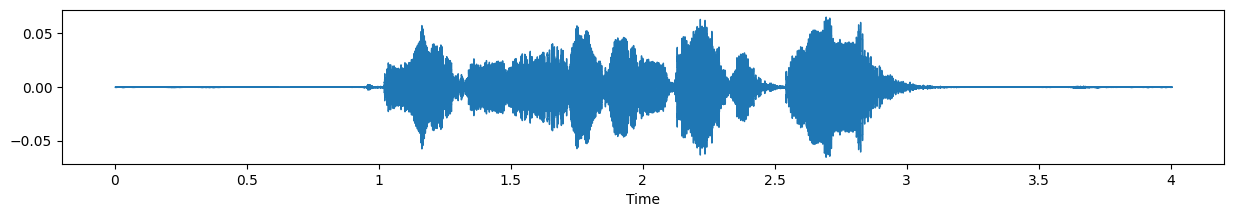

In [ ]:
plt.figure(figsize=(15,2))
librosa.display.waveshow(y=samples, sr=22050)
Audio(samples, rate=sample_rate)

print(DATA["emotion"][5])
Audio(DATA["file"][5])


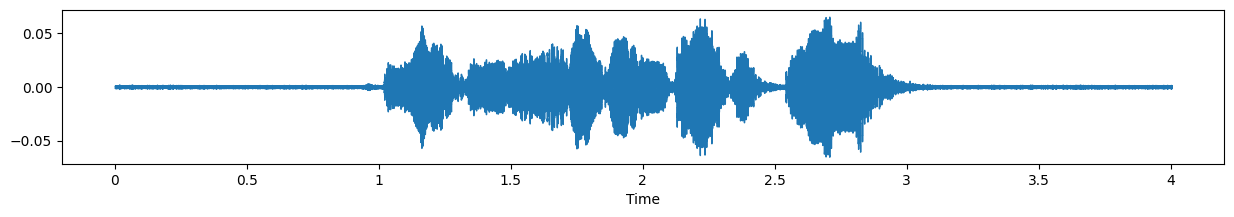

In [ ]:
n = noise(samples)
plt.figure(figsize=(15,2))
librosa.display.waveshow(y=n, sr=sample_rate)
Audio(n, rate=sample_rate)

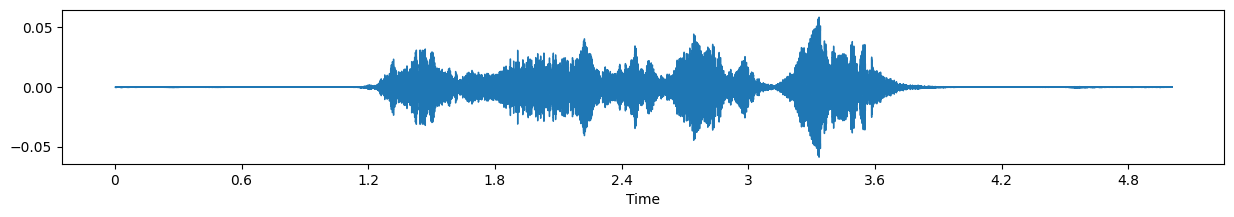

In [ ]:
n = stretch(samples,0.8)
plt.figure(figsize=(15,2))
librosa.display.waveshow(y=n, sr=sample_rate)
Audio(n, rate=sample_rate)

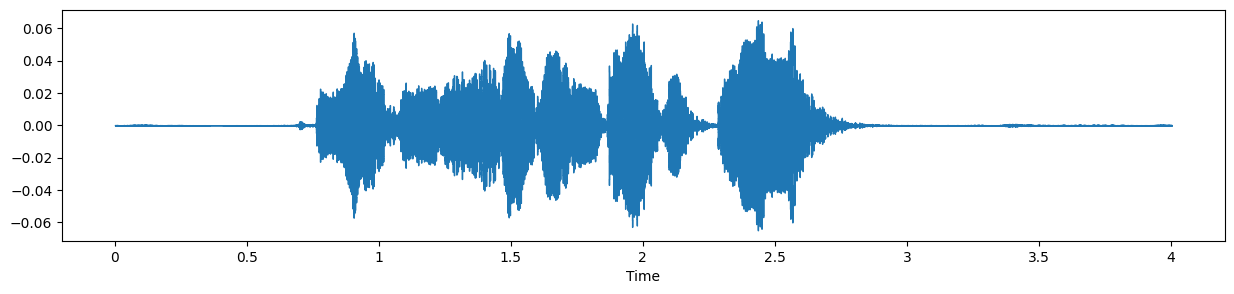

In [ ]:
n = shift(samples)
plt.figure(figsize=(15,2))
librosa.display.waveshow(y=n, sr=sample_rate)
Audio(n, rate=sample_rate)

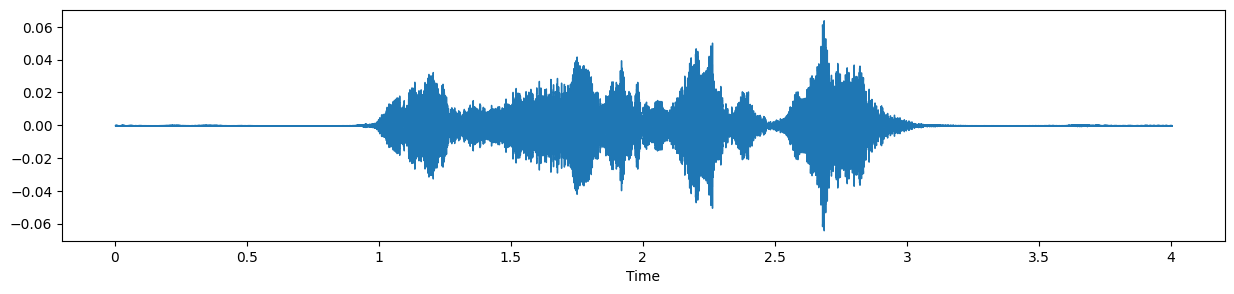

In [ ]:
n = pitch(data=samples,sampling_rate=22050, pitch_factor=0.7)
plt.figure(figsize=(15,2))
librosa.display.waveshow(y=n, sr=sample_rate)
Audio(n, rate=sample_rate)